In [1]:

import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import inf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt




data=pd.read_excel('C:/Users/user/Proj/Algo_jupy/Training_data_1.xlsx')

#data = pd.get_dummies(data, columns=['host-rock type','protolith'])

data= data.replace('<0.03', 0)
data= data.replace(np.nan, 0)

data= data.drop(columns=['author','journal','region','sample name','host-rock_type/metamorphic_facies','lithology/protolith','P(kbar)','T(°C)',])



In [2]:
data.head()

,metamorphic_facies,composition,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,GR,M,38.35,0.04,20.54,0.01,0.0,6.54,5.13,0.78
1,GR,M,38.14,0.01,20.40,0.03,0.0,6.61,5.35,0.74
2,GR,M,37.77,0.02,20.37,0.01,0.0,6.81,5.05,0.76
3,GR,M,38.25,0.02,20.22,0.04,0.0,6.87,5.00,0.79
4,GR,M,38.02,0.00,20.34,0.05,0.0,7.00,4.88,0.80


In [4]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Assigning numerical values and storing in another column
data['Comp'] = le.fit_transform(data['composition'])

data_rev=data[['SiO2','TiO2','Al2O3','Cr2O3','FeOtotal','MnO','MgO','CaO']]
data_rest=data.drop(columns=['SiO2','TiO2','Al2O3','Cr2O3','FeOtotal','MnO','MgO','CaO'])


In [129]:


#SiO conversion
df_SiO =data_rev.copy()
#taking out  df/SiOO2)
df_SiO=df_SiO.div(df_SiO['SiO2'], axis=0)
# rename columns
df_SiO.columns = '('+ df_SiO.columns +'/'+ 'SiO2)'

df_SiO=df_SiO.round(6)
df_SiO.drop(columns=['(SiO2/SiO2)'], axis=1, inplace=True)

df_SiO = df_SiO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)


#CaO converSiOon
df_CaO=data_rev.copy()
#taking out  df/CaO)
df_CaO=df_CaO.div(df_CaO['CaO'], axis=0)
# rename columns
df_CaO.columns = '('+ df_CaO.columns +'/'+ 'CaO)'

df_CaO=df_CaO.round(6)
df_CaO.drop(columns=['(CaO/CaO)'], axis=1, inplace=True)

df_CaO = df_CaO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_CaO= df_CaO.replace(inf, 0)
df_CaO= df_CaO.replace(np.nan, 0)

#MgO conversion
df_MgO=data_rev.copy()
#taking out  df/MgO)
df_MgO=df_MgO.div(df_MgO['MgO'], axis=0)
# rename columns
df_MgO.columns = '('+ df_MgO.columns +'/'+ 'MgO)'

df_MgO=df_MgO.round(6)
df_MgO.drop(columns=['(MgO/MgO)'], axis=1, inplace=True)

df_MgO = df_MgO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_MgO= df_MgO.replace(inf, 0)
df_MgO= df_MgO.replace(np.nan, 0)

#MnO conversion
df_MnO=data_rev.copy()
#taking out  df/MnO)
df_MnO=df_MnO.div(df_MnO['MnO'], axis=0)
# rename columns
df_MnO.columns = '('+ df_MnO.columns +'/'+ 'MnO)'

df_MnO=df_MnO.round(6)
df_MnO.drop(columns=['(MnO/MnO)'], axis=1, inplace=True)

df_MnO = df_MnO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_MnO= df_MnO.replace(inf, 0)
df_MnO= df_MnO.replace(np.nan, 0)

#Al2O3 conversion
df_Al2O3=data_rev.copy()
#taking out  df/Al2O3)
df_Al2O3=df_Al2O3.div(df_Al2O3['Al2O3'], axis=0)
# rename columns
df_Al2O3.columns = '('+ df_Al2O3.columns +'/'+ 'Al2O3)'

df_Al2O3=df_Al2O3.round(6)
df_Al2O3.drop(columns=['(Al2O3/Al2O3)'], axis=1, inplace=True)

df_Al2O3 = df_Al2O3.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Al2O3= df_Al2O3.replace(inf, 0)
df_Al2O3= df_Al2O3.replace(np.nan, 0)




#Cr2O3 conversion
df_Cr2O3=data_rev.copy()
#taking out  df/Cr2O3)
df_Cr2O3=df_Cr2O3.div(df_Cr2O3['Cr2O3'], axis=0)
# rename columns
df_Cr2O3.columns = '('+ df_Cr2O3.columns +'/'+ 'Cr2O3)'

df_Cr2O3=df_Cr2O3.round(6)
df_Cr2O3.drop(columns=['(Cr2O3/Cr2O3)'], axis=1, inplace=True)

df_Cr2O3 = df_Cr2O3.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Cr2O3= df_Cr2O3.replace(inf, 0)
df_Cr2O3= df_Cr2O3.replace(np.nan, 0)

#FeO conversion
df_FeO=data_rev.copy()
#taking out  df/FeOtotal)
df_FeO=df_FeO.div(df_FeO['FeOtotal'], axis=0)
# rename columns
df_FeO.columns = '('+ df_FeO.columns +'/'+ 'FeO)'

df_FeO=df_FeO.round(6)
df_FeO.drop(columns=['(FeOtotal/FeO)'], axis=1, inplace=True)

df_Fe = df_FeO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_FeO= df_FeO.replace(inf, 0)
df_FeO= df_FeO.replace(np.nan, 0)





#Si conversion
df_Si=data_rev.copy()
#taking out  df/SiO2)
df_Si=df_Si.div(df_Si['SiO2'], axis=0)
# rename columns
df_Si.columns = '('+ df_Si.columns +'/'+ 'SiO2)'

df_Si=df_Si.round(6)
df_Si.drop(columns=['(SiO2/SiO2)'], axis=1, inplace=True)
#taking out  df/Si
df_Si=df_Si.mul([0.752,1.179,0.791,0.847,0.836,1.491,1.071], axis='columns')
# rename columns
df_Si.rename(columns = {'(TiO2/SiO2)':'Ti/Si','(Al2O3/SiO2)':'Al/Si','(Cr2O3/SiO2)':'Cr/Si','(MnO/SiO2)':'Mn/Si','(FeOtotal/SiO2)':'Fe/Si','(MgO/SiO2)':'Mg/Si','(CaO/SiO2)':'Ca/Si'}, inplace = True)

df_Si = df_Si.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)


#Ca conversion
df_Ca=data_rev.copy()
#taking out  df/CaO)
df_Ca=df_Ca.div(df_Ca['CaO'], axis=0)
# rename columns
df_Ca.columns = '('+ df_Ca.columns +'/'+ 'CaO)'

df_Ca=df_Ca.round(6)
df_Ca.drop(columns=['(CaO/CaO)'], axis=1, inplace=True)
#taking out  df/Ca
df_Ca=df_Ca.mul([0.933,0.702,0.550,0.369,0.781,0.791,1.391], axis='columns')
# rename columns
df_Ca.rename(columns = {'(TiO2/CaO)':'Ti/Ca','(Al2O3/CaO)':'Al/Ca','(Cr2O3/CaO)':'Cr/Ca','(MnO/CaO)':'Mn/Ca','(FeOtotal/CaO)':'Fe/Ca','(MgO/CaO)':'Mg/Ca','(SiO2/CaO)':'Si/Ca'}, inplace = True)

df_Ca = df_Ca.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Ca= df_Ca.replace(inf, 0)
df_Ca= df_Ca.replace(np.nan, 0)

#Mg conversion
df_Mg=data_rev.copy()
#taking out  df/MgO)
df_Mg=df_Mg.div(df_Mg['MgO'], axis=0)
# rename columns
df_Mg.columns = '('+ df_Mg.columns +'/'+ 'MgO)'

df_Mg=df_Mg.round(6)
df_Mg.drop(columns=['(MgO/MgO)'], axis=1, inplace=True)
#taking out  df/Mg
df_Mg=df_Mg.mul([0.671,0.505,0.395,0.265,0.561,0.568,0.719], axis='columns')
# rename columns
df_Mg.rename(columns = {'(TiO2/MgO)':'Ti/Mg','(Al2O3/MgO)':'Al/Mg','(Cr2O3/MgO)':'Cr/Mg','(MnO/MgO)':'Mn/Mg','(FeOtotal/MgO)':'Fe/Mg','(SiO2/MgO)':'Si/Mg','(CaO/MgO)':'Ca/Mg'}, inplace = True)

df_Mg = df_Mg.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Mg= df_Mg.replace(inf, 0)
df_Mg= df_Mg.replace(np.nan, 0)

#Mn conversion
df_Mn=data_rev.copy()
#taking out  df/MnO)
df_Mn=df_Mn.div(df_Mn['MnO'], axis=0)
# rename columns
df_Mn.columns = '('+ df_Mn.columns +'/'+ 'MnO)'

df_Mn=df_Mn.round(6)
df_Mn.drop(columns=['(MnO/MnO)'], axis=1, inplace=True)
#taking out  df/Mn
df_Mn=df_Mn.mul([1.181,0.888,0.696,0.467,0.987,1.760,1.265], axis='columns')
# rename columns
df_Mn.rename(columns = {'(TiO2/MnO)':'Ti/Mn','(Al2O3/MnO)':'Al/Mn','(Cr2O3/MnO)':'Cr/Mn','(MgO/MnO)':'Mg/Mn','(FeOtotal/MnO)':'Fe/Mn','(SiO2/MnO)':'Si/Mn','(CaO/MnO)':'Ca/Mn'}, inplace = True)

df_Mn = df_Mn.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Mn= df_Mn.replace(inf, 0)
df_Mn= df_Mn.replace(np.nan, 0)

#Al conversion
df_Al=data_rev.copy()
#taking out  df/Al2O3)
df_Al=df_Al.div(df_Al['Al2O3'], axis=0)
# rename columns
df_Al.columns = '('+ df_Al.columns +'/'+ 'Al2O3)'

df_Al=df_Al.round(6)
df_Al.drop(columns=['(Al2O3/Al2O3)'], axis=1, inplace=True)
#taking out  df/Al
df_Al=df_Al.mul([1.181,0.888,0.696,0.467,0.987,1.760,1.265], axis='columns')
# rename columns
df_Al.rename(columns = {'(TiO2/Al2O3)':'Ti/Al','(MnO/Al2O3)':'Mn/Al','(Cr2O3/Al2O3)':'Cr/Al','(MgO/Al2O3)':'Mg/Al','(FeOtotal/Al2O3)':'Fe/Al','(SiO2/Al2O3)':'Si/Al','(CaO/Al2O3)':'Ca/Al'}, inplace = True)

df_Al = df_Al.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Al= df_Al.replace(inf, 0)
df_Al= df_Al.replace(np.nan, 0)




#Cr conversion
df_Cr=data_rev.copy()
#taking out  df/Cr2O3)
df_Cr=df_Cr.div(df_Cr['Cr2O3'], axis=0)
# rename columns
df_Cr.columns = '('+ df_Cr.columns +'/'+ 'Cr2O3)'

df_Cr=df_Cr.round(6)
df_Cr.drop(columns=['(Cr2O3/Cr2O3)'], axis=1, inplace=True)
#taking out  df/Cr
df_Cr=df_Cr.mul([2.530,1.903,1.491,2.116,2.143,3.771,2.710], axis='columns')
# rename columns
df_Cr.rename(columns = {'(TiO2/Cr2O3)':'Ti/Cr','(MnO/Cr2O3)':'Mn/Cr','(Al2O3/Cr2O3)':'Al/Cr','(MgO/Cr2O3)':'Mg/Cr','(FeOtotal/Cr2O3)':'Fe/Cr','(SiO2/Cr2O3)':'Si/Cr','(CaO/Cr2O3)':'Ca/Cr'}, inplace = True)

df_Cr = df_Cr.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Cr= df_Cr.replace(inf, 0)
df_Cr= df_Cr.replace(np.nan, 0)

#Fe conversion
df_Fe=data_rev.copy()
#taking out  df/FeOtotal)
df_Fe=df_Fe.div(df_Fe['FeOtotal'], axis=0)
# rename columns
df_Fe.columns = '('+ df_Fe.columns +'/'+ 'FeO)'

df_Fe=df_Fe.round(6)
df_Fe.drop(columns=['(FeOtotal/FeO)'], axis=1, inplace=True)
#taking out  df/Fe
df_Fe=df_Fe.mul([1.196,0.900,0.705,0.473,1.013,1.783,1.281], axis='columns')
# rename columns
df_Fe.rename(columns = {'(TiO2/FeO)':'Ti/Fe','(MnO/FeO)':'Mn/Fe','(Al2O3/FeO)':'Al/Fe','(MgO/FeO)':'Mg/Fe','(Cr2O3/FeO)':'Cr/Fe','(SiO2/FeO)':'Si/Fe','(CaO/FeO)':'Ca/Fe'}, inplace = True)

df_Fe = df_Fe.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Fe= df_Fe.replace(inf, 0)
df_Fe= df_Fe.replace(np.nan, 0)




#Fe/Mg/Ca/Mn no conversion
df_n=data_rev.copy()

df_n =df_n[['FeOtotal','MnO','MgO','CaO']]


df_n1 = df_n['FeOtotal'].div(71.8444)
df_n2 = df_n['MgO'].div(40.305)
df_n3 = df_n['CaO'].div(56.0774)


#df_n =(df_n['Mno']/54.9380)


df_n= pd.concat([df_n1,df_n2,df_n3],axis=1)



df_n['(Fe+Mg)']= df_n['MgO'] + df_n['FeOtotal']
df_n['(Ca+Mg)']=df_n['CaO'] + df_n['MgO'] 



df_n['Mg/(Fe+Mg)']=df_n['MgO'].div(df_n['(Fe+Mg)'], axis=0)
df_n['Ca/(Ca+Mg)']=df_n['CaO'].div(df_n['(Ca+Mg)'], axis=0)





In [130]:
#data_1= pd.concat([data_rest,df_Si,df_Ca,df_Mg,df_Mn,df_Al,df_Cr,df_Fe,df_n['Ca/(Ca+Mg)'],df_n['Mg/(Fe+Mg)']],axis=1)

In [176]:
data_1=data.copy()

In [177]:
data_1.head()

,metamorphic_facies,composition,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO,Comp
0,GR,M,38.35,0.04,20.54,0.01,0.0,6.54,5.13,0.78,3
1,GR,M,38.14,0.01,20.40,0.03,0.0,6.61,5.35,0.74,3
2,GR,M,37.77,0.02,20.37,0.01,0.0,6.81,5.05,0.76,3
3,GR,M,38.25,0.02,20.22,0.04,0.0,6.87,5.00,0.79,3
4,GR,M,38.02,0.00,20.34,0.05,0.0,7.00,4.88,0.80,3


In [178]:


df=data_1.copy()
labels_1=['A','CS','IF','M','S','UM']
labels= le.fit_transform(df['Comp'])
data_X= df.drop(columns=['metamorphic_facies','composition',])
data_X= data_X.drop(columns=['Comp'])



In [179]:
feature_names=list(data_X.columns.values.tolist())

In [180]:
feature_names

['SiO2', 'TiO2', 'Al2O3', 'Cr2O3', 'FeOtotal', 'MnO', 'MgO', 'CaO']

In [181]:
data_X

,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78
1,38.14,0.01,20.40,0.03,0.00,6.61,5.35,0.74
2,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76
3,38.25,0.02,20.22,0.04,0.00,6.87,5.00,0.79
4,38.02,0.00,20.34,0.05,0.00,7.00,4.88,0.80
...,...,...,...,...,...,...,...,...
14378,37.68,0.15,8.24,0.00,19.76,1.43,0.07,32.26
14379,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98
14380,36.72,0.14,2.41,0.00,27.07,1.32,0.13,31.22
14381,38.18,0.00,8.04,0.00,19.68,1.51,0.07,32.55


In [182]:
labels

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [183]:
x = data_X.values
x = StandardScaler().fit_transform(x) # normalizing the features

<IPython.core.display.Javascript object>

In [184]:
x

array([[-1.38036826e-01, -2.62505736e-01,  3.61380335e-02, ...,
         8.92672333e-01, -2.60316661e-01, -9.95940719e-01],
       [-2.46305055e-01, -3.13615122e-01, -1.24671200e-03, ...,
         9.08088081e-01, -2.26739154e-01, -1.00095889e+00],
       [-4.37063364e-01, -2.96578660e-01, -9.25772889e-03, ...,
         9.52133076e-01, -2.72526664e-01, -9.98449806e-01],
       ...,
       [-9.78404510e-01, -9.21411185e-02, -4.80518651e+00, ...,
        -2.56902035e-01, -1.02344183e+00,  2.82288847e+00],
       [-2.25682535e-01, -3.30651584e-01, -3.30178567e+00, ...,
        -2.15059290e-01, -1.03259933e+00,  2.98974270e+00],
       [-9.06225691e-01, -3.30651584e-01, -4.90398905e+00, ...,
        -3.31778526e-01, -1.01275808e+00,  2.86177930e+00]])

In [185]:
x.shape

(14383, 8)

In [186]:
np.mean(x),np.std(x)

(1.7586957792574265e-16, 1.0)

In [187]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [188]:
normalised_df=pd.DataFrame(x,columns=feat_cols)

In [189]:
normalised_df.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
14378,-0.483464,-0.075105,-3.248379,-0.252018,-0.251602,-0.232677,-1.032599,2.953361
14379,-0.452530,-0.228433,-3.547457,-0.082087,-0.149850,-0.230475,-1.015811,2.918234
14380,-0.978405,-0.092141,-4.805187,-0.252018,0.565766,-0.256902,-1.023442,2.822888
14381,-0.225683,-0.330652,-3.301786,-0.252018,-0.260547,-0.215059,-1.032599,2.989743
14382,-0.906226,-0.330652,-4.903989,-0.252018,0.598193,-0.331779,-1.012758,2.861779


In [190]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=4)
principalComponents_df = pca_df.fit_transform(x)

In [191]:
'principal component 5', 'principal component 6', 'principal component 7','principal component 8'

('principal component 5',
 'principal component 6',
 'principal component 7',
 'principal component 8')

In [192]:
principal_df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'
                         ])

In [193]:
principal_df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4
14378,2.186396,3.428935,-0.412154,-1.210866
14379,2.225661,3.530507,-0.372486,-1.470327
14380,3.170339,3.898558,-0.704056,-1.597397
14381,2.056146,3.383961,-0.360762,-1.441086
14382,3.146223,3.883860,-0.748854,-1.842456


In [194]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))


Explained variation per principal component: [0.35804917 0.25683442 0.12884837 0.11189149]


In [195]:
print(abs( pca_df.components_.T ))

[[0.55303515 0.0142122  0.01378376 0.02576395]
 [0.03621602 0.36150307 0.15859201 0.83062366]
 [0.27090575 0.54306633 0.0030617  0.19506679]
 [0.25871396 0.30996088 0.28401134 0.40595093]
 [0.39618028 0.37375165 0.35333788 0.12040078]
 [0.21956716 0.11307828 0.86736091 0.22511788]
 [0.55917869 0.03755595 0.07461648 0.12131383]
 [0.18619431 0.56941138 0.10609682 0.16328469]]


In [196]:
loadings = pca_df.components_.T * np.sqrt(pca_df.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['principal component 1', 'principal component 2',
                                                 'principal component 3','principal component 4'
                                                ], index=feature_names)
loading_matrix

,principal component 1,principal component 2,principal component 3,principal component 4
SiO2,-0.936018,-0.020373,-0.013995,-0.024376
TiO2,0.061296,0.518202,-0.161020,0.785892
Al2O3,-0.458511,-0.778466,0.003109,0.184562
Cr2O3,-0.437876,0.444318,0.288360,-0.384089
FeOtotal,0.670539,-0.535759,-0.358748,-0.113917
MnO,0.371620,-0.162094,0.880642,0.212995
MgO,-0.946416,0.053835,-0.075759,0.114781
CaO,0.315136,0.816231,-0.107721,-0.154491


In [202]:
#loading_cleaned = loading_matrix[(loading_matrix['principal component 1'] > 0.6)]

In [203]:
#loading_cleaned

,principal component 1,principal component 2,principal component 3,principal component 4
FeOtotal,0.670539,-0.535759,-0.358748,-0.113917


In [199]:
#imp_feat_list = loading_cleaned.index.tolist()

In [155]:
#imp_feat_list

['FeOtotal']

In [156]:
#data_new = data_X[imp_feat_list]

In [241]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,2], coeff[i,3], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,2]* 1.15, coeff[i,3] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC2')
    plt.ylabel('PC3')
    plt.grid()
    plt.savefig('2_3_1.jpg')

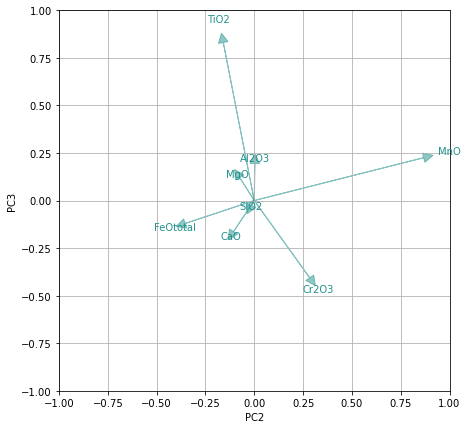

In [242]:
fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca_df.components_.T,feature_names)

In [249]:
def biplot(score, coeff , y):
    '''
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score.iloc[:,1] # projection on PC1
    ys = score.iloc[:,2] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','b','c','y','m']
    markers=['o','^','x','s','p','P']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    limx= int(xs.max())
    limy= int(ys.max()) 
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.legend(labels_1)
    plt.tick_params(axis='both', which='both', labelsize=14)
    plt.savefig('1_2_2.jpg')

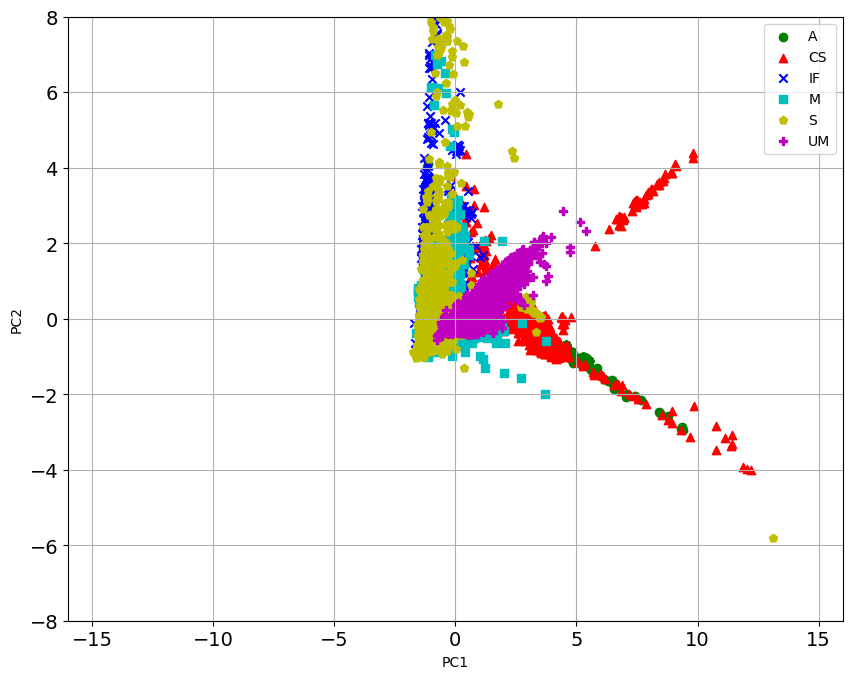

In [250]:
#Call the function. Use only the 2 PCs.
biplot(principal_df, pca_df.components_.T, labels)
plt.show()

In [293]:
def loading_plot_3d(coeff, labels):
    plt.figure(figsize=(20, 20))
    ax = plt.axes(projection='3d')
    n = coeff.shape[0]
    for i in range(n):
        ax.quiver(0,0, 0, coeff[i,0], coeff[i,1],coeff[i,2], color='#21918C', alpha=0.7,linewidth=1, arrow_length_ratio=0.05)
        ax.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, coeff[i,2] * 1.1, labels[i],ha='center', va='center', color='#21918C', fontsize=12)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_zlim3d(-0.5, 0.5)                   # viewrange for z-axis should be [-4,4] 
    ax.set_ylim3d(-0.5, 0.5)                    # viewrange for y-axis should be [-2,2]
    ax.set_xlim3d(-0.5, 0.5)
    
    azim = 180  # azimuth
    elev = 30   # elevation
    ax.view_init(elev, azim)
    
    plt.title("Compositional Tri-plot")
    plt.grid()
    plt.savefig('3D_3_1.jpg')

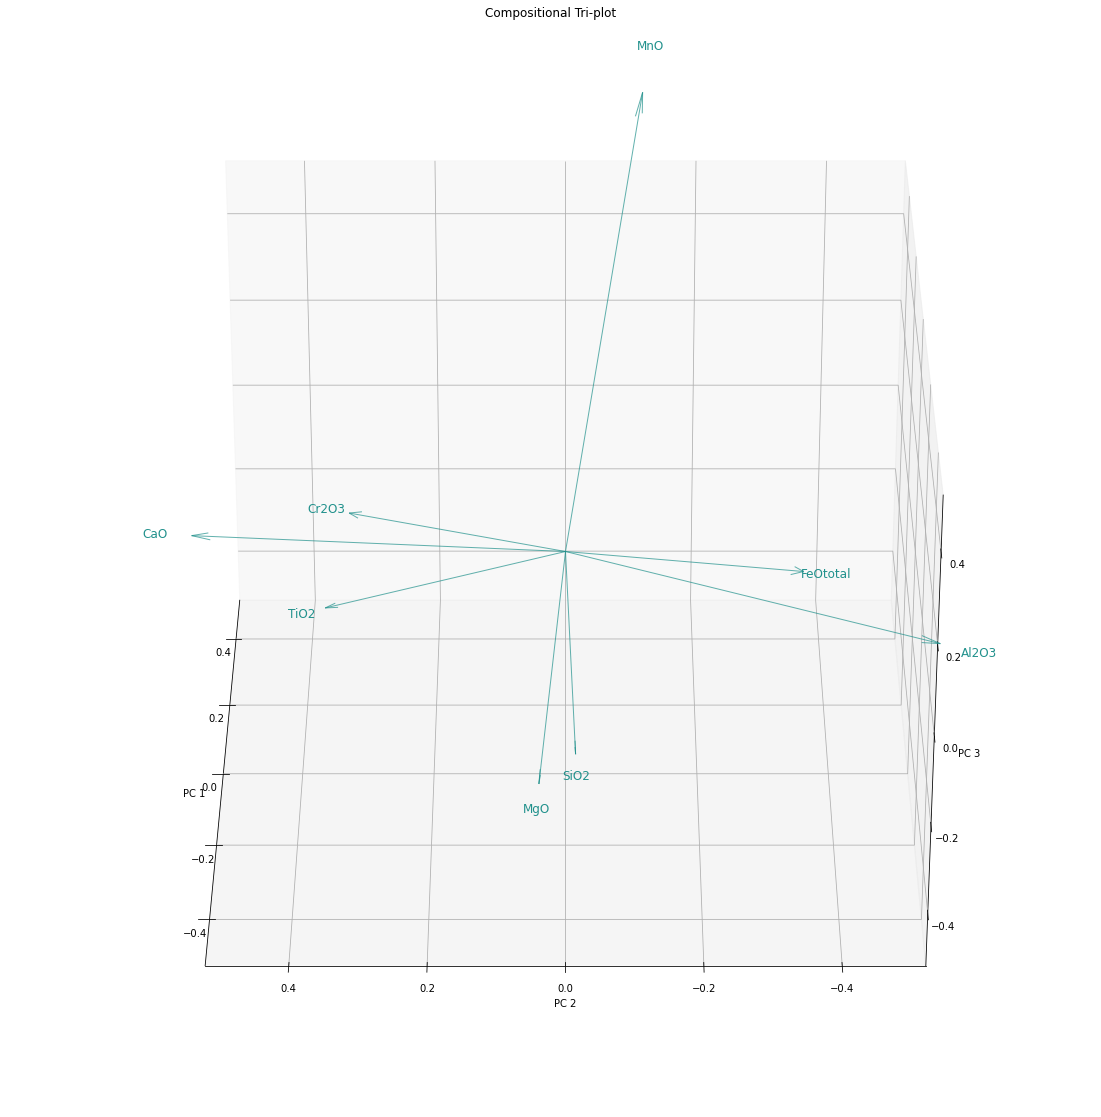

In [294]:
loading_plot_3d(pca_df.components_.T,feature_names)

In [289]:
def triplot(score, coeff , y):
    '''
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    
    plt.figure(figsize=(20, 20))
    ax = plt.axes(projection='3d')
    
    xs = score.iloc[:,0] # projection on PC1
    ys = score.iloc[:,1] # projection on PC2
    zs = score.iloc[:,2] # projection on PC2
    
    n = coeff.shape[0] # number of variables
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scalez = 1.0/(zs.max() - zs.min())
    
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','b','c','y','m']
    markers=['o','^','x','s','p','P']
    
    
    for i, label in enumerate(classes):
            ax.scatter3D(xs[y == label] * scalex,
                         ys[y == label] * scaley,
                         zs[y == label] * scalez,
                         linewidth=0.01)
            ax.legend(labels_1)
    
    
    azim = 90  # azimuth
    elev = 30   # elevation
    ax.view_init(elev, azim)
    
   
    
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    ax.set_zlim3d(0.25,-0.25)                   # viewrange for z-axis should be [-4,4] 
    ax.set_ylim3d(0.25,-0.25)                    # viewrange for y-axis should be [-2,2]
    ax.set_xlim3d(0.25,-0.25) 
    ax.set_title("Compositional Tri-plot")
    

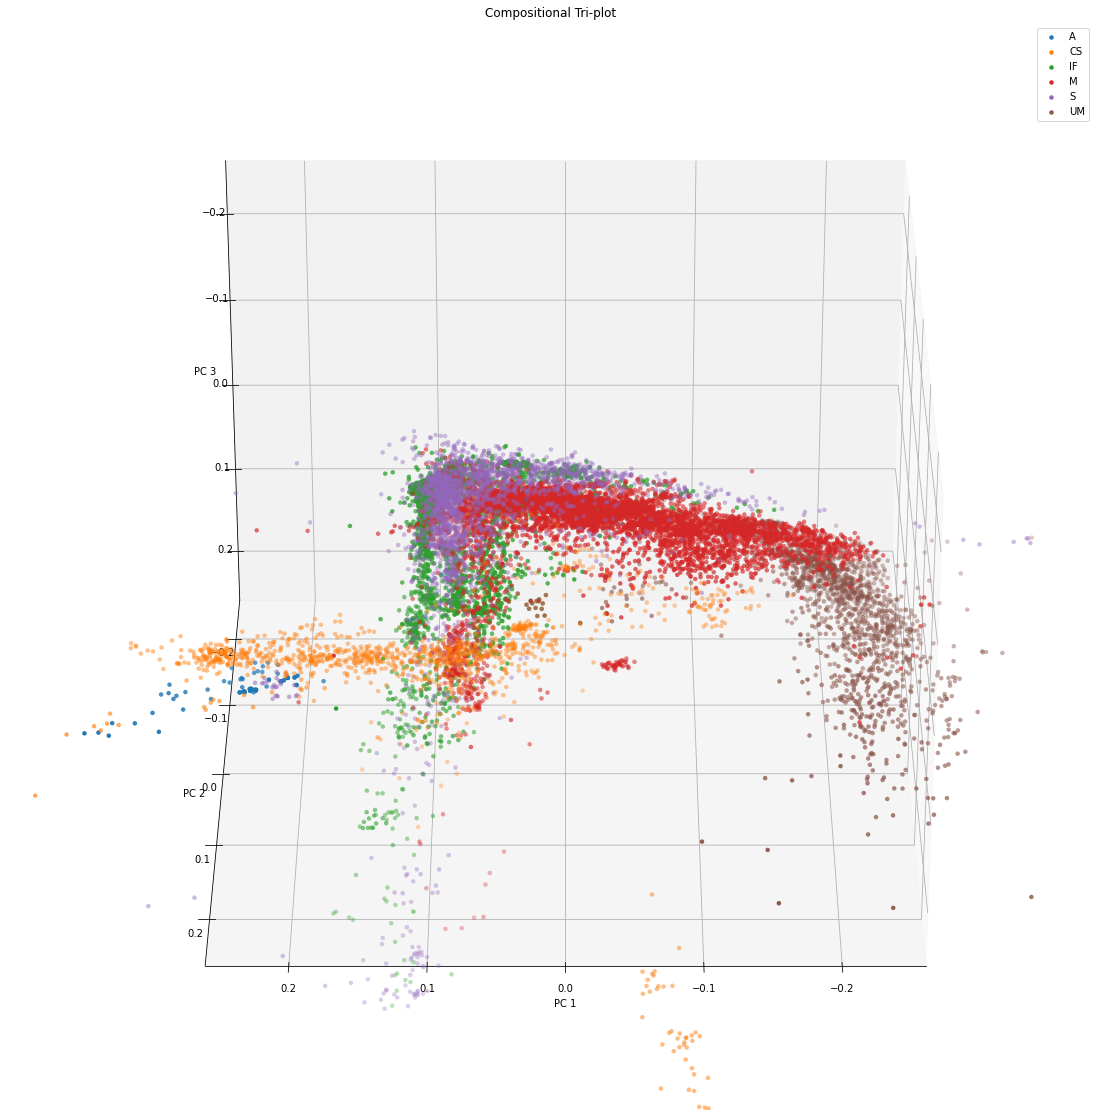

<Figure size 1000x800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [295]:
#Call the function. Use only the 2 PCs.
triplot(principal_df, pca_df.components_.T, labels)
plt.show()
plt.savefig('3D_3_2.png')